Este notebook se centra en el análisis de la influencia de la aplicación de transformaciones correctivas en coordenadas cartesianas de la data obtenida por simulaciones en CRPropa3 con un observador situado alejado de (0,0,0).

### Paso 1: Importando las liberías necesarias

In [247]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import pylab as pl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Paso 2: Ploteo de cada caso en coordenadas galácticas aplicando transformación

In [248]:
#Obtención y transformación a coord. galácticas de las fuentes
sources = np.genfromtxt('Data/G_sources_cartesian_in_the_border_of_thegalaxy.txt',names=True)
ds=SkyCoord(sources['X']*u.kpc, sources['Y']*u.kpc,sources['Z']*u.kpc, representation_type='cartesian')
ds=ds.galactic

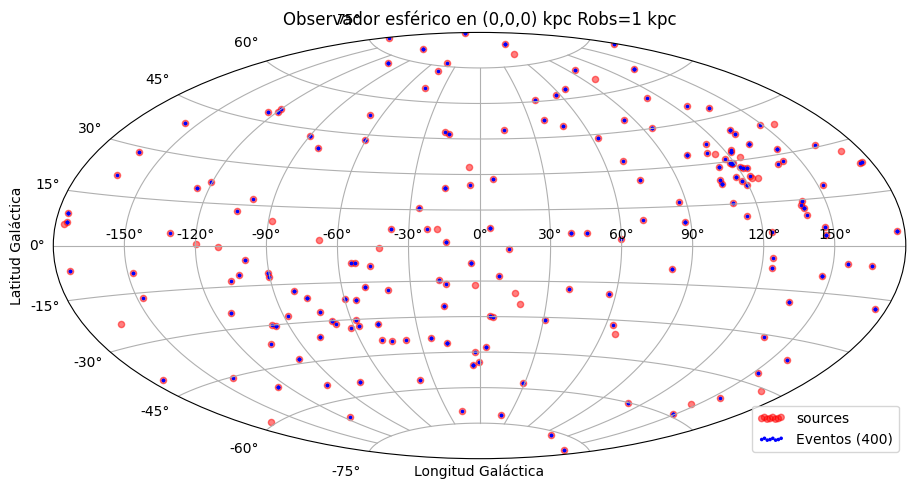

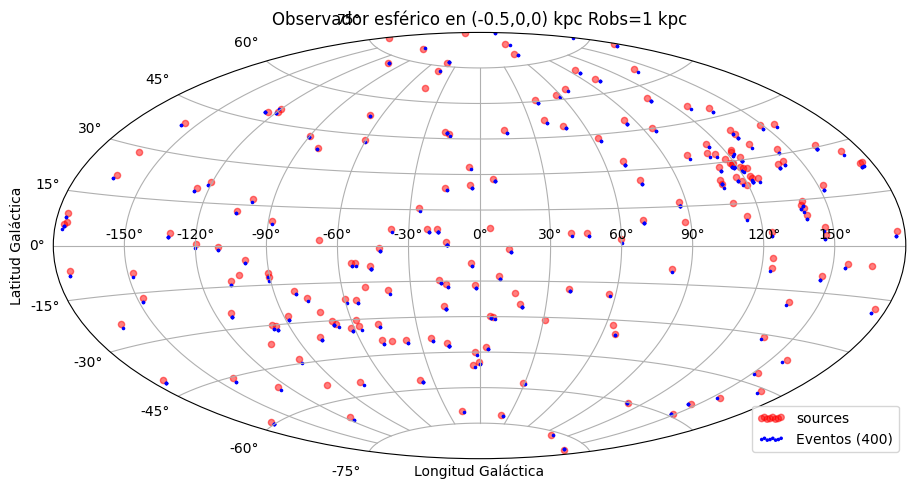

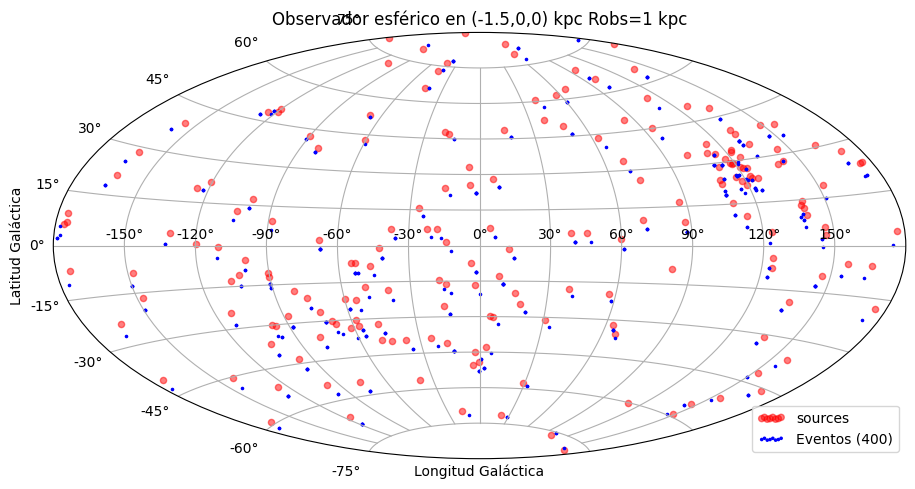

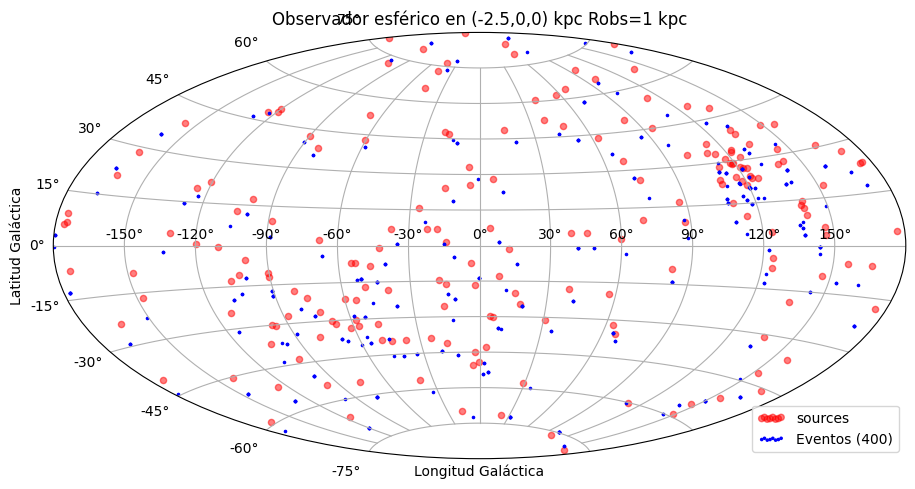

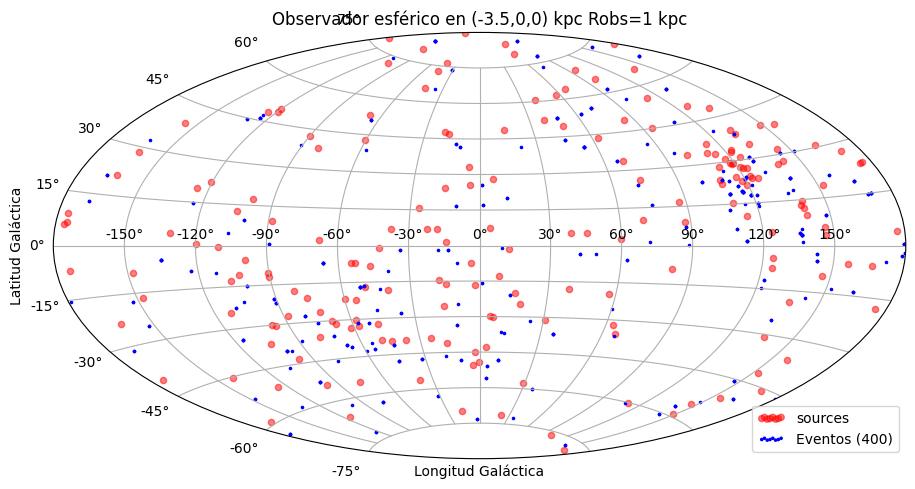

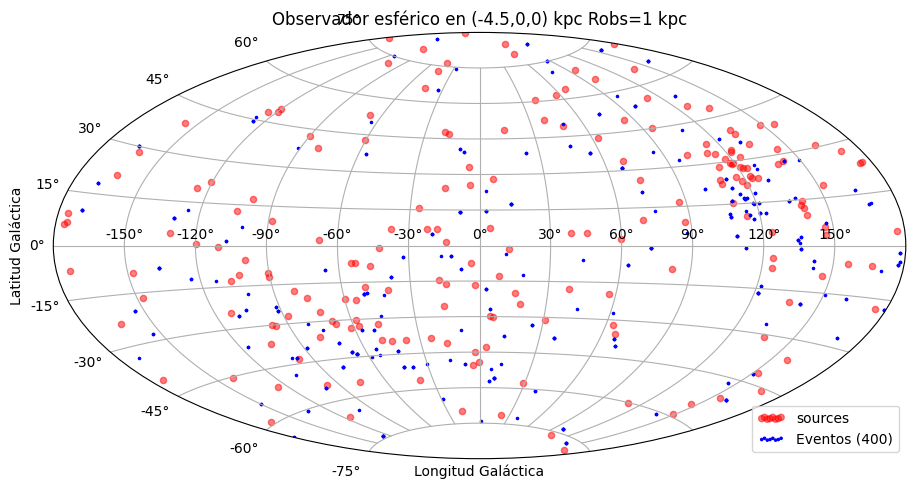

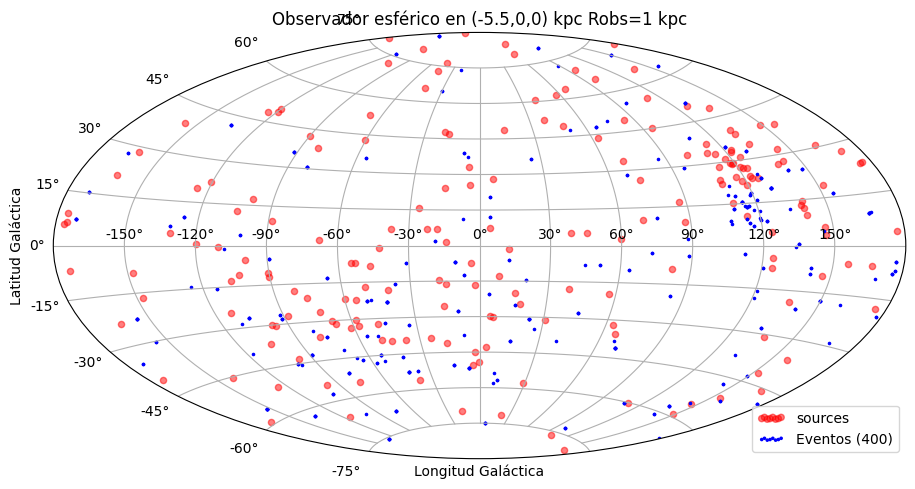

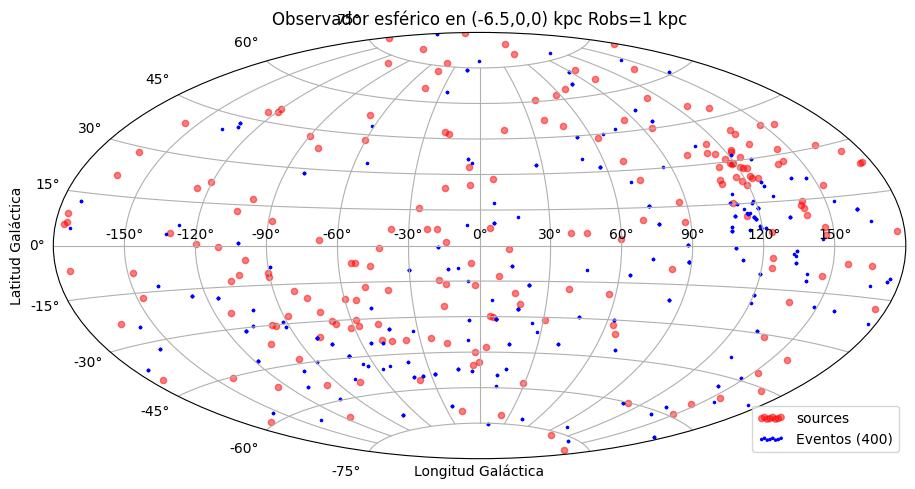

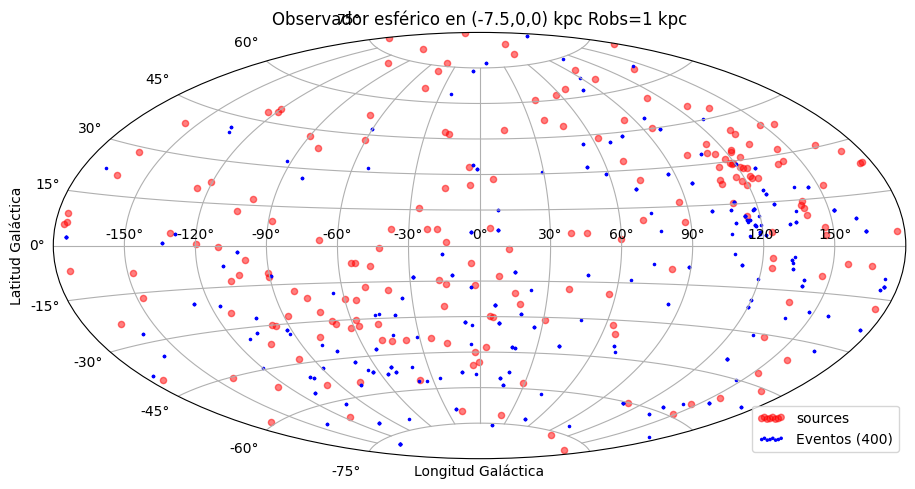

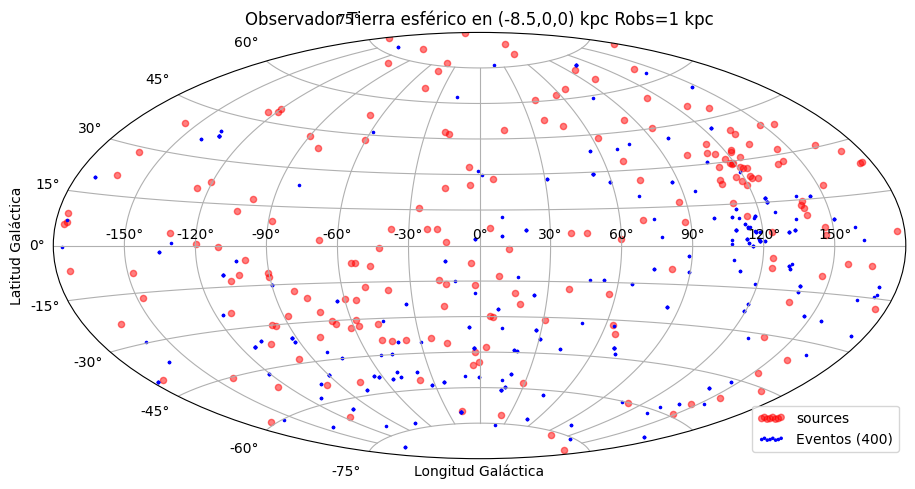

In [249]:
#Función para graficar mapas en coordenadas galácticas de la data aplicando una transformación en x
def plot_case(data_filename, title, delta_x=0.0):
    
    d = np.genfromtxt(data_filename, names=True)
    c = SkyCoord(x=(d['X'] + delta_x), y=d['Y'], z=d['Z'], unit='Mpc', representation_type='cartesian')
    g = c.galactic
    
    fig = plt.figure(figsize=(11, 8))
    ax = fig.add_subplot(111, projection='aitoff')
    
    ax.scatter(ds.l.wrap_at('180d').radian, ds.b.radian, color='red', s=20, alpha=0.5, label="sources")
    ax.scatter(g.l.wrap_at('180d').radian, g.b.radian, color='blue', label=f'Eventos ({len(g)})', s=10, marker='.')
    
    ax.grid(True)
    plt.xlabel('Longitud Galáctica')
    plt.ylabel('Latitud Galáctica')
    plt.title(title)
    plt.legend(loc='lower right', fontsize=10, scatterpoints=8)
    
    return fig

# Lista de casos que deseas representar en el multiplot
cases = [
    {
        'data_filename': 'Data/events_JF12_fixedsources_d=-0.0kpc.txt',
        'title': 'Observador esférico en (0,0,0) kpc Robs=1 kpc'
    },
    {
        'data_filename': 'Data/events_JF12_fixedsources_d=-0.5kpc.txt',
        'title': 'Observador esférico en (-0.5,0,0) kpc Robs=1 kpc',
        'delta_x': 0.5 * 10**-3
    },
    {
        'data_filename': 'Data/events_JF12_fixedsources_d=-1.5kpc.txt',
        'title': 'Observador esférico en (-1.5,0,0) kpc Robs=1 kpc',
        'delta_x': 1.5 * 10**-3
    },{
        'data_filename': 'Data/events_JF12_fixedsources_d=-2.5kpc.txt',
        'title': 'Observador esférico en (-2.5,0,0) kpc Robs=1 kpc',
        'delta_x': 2.5 * 10**-3
    },{
        'data_filename': 'Data/events_JF12_fixedsources_d=-3.5kpc.txt',
        'title': 'Observador esférico en (-3.5,0,0) kpc Robs=1 kpc',
        'delta_x': 3.5 * 10**-3
    },{
        'data_filename': 'Data/events_JF12_fixedsources_d=-4.5kpc.txt',
        'title': 'Observador esférico en (-4.5,0,0) kpc Robs=1 kpc',
        'delta_x': 4.5 * 10**-3
    },{
        'data_filename': 'Data/events_JF12_fixedsources_d=-5.5kpc.txt',
        'title': 'Observador esférico en (-5.5,0,0) kpc Robs=1 kpc',
        'delta_x': 5.5 * 10**-3
    },{
        'data_filename': 'Data/events_JF12_fixedsources_d=-6.5kpc.txt',
        'title': 'Observador esférico en (-6.5,0,0) kpc Robs=1 kpc',
        'delta_x': 6.5 * 10**-3
    },{
        'data_filename': 'Data/events_JF12_fixedsources_d=-7.5kpc.txt',
        'title': 'Observador esférico en (-7.5,0,0) kpc Robs=1 kpc',
        'delta_x': 7.5 * 10**-3
    },{
        'data_filename': 'Data/events_JF12_fixedsources_d=-8.5kpc.txt',
        'title': 'Observador Tierra esférico en (-8.5,0,0) kpc Robs=1 kpc',
        'delta_x': 8.5 * 10**-3
    },
]

# Genera y muestra cada gráfico individual
for case in cases:
    plot_case(case['data_filename'], case['title'], delta_x=case.get('delta_x', 0.0))
    plt.show()

### Paso 3: Creación de data Frames para el análisis de datos

In [250]:
# Lista de valores de desplazamiento
delta_values = [-0.0, -0.5, -1.5, -2.5, -3.5, -4.5, -5.5, -6.5, -7.5, -8.5]

# Lista para almacenar los DataFrames
case_dfs = []

for delta in delta_values:
    # Genera el nombre del archivo basado en el valor de delta
    filename = f'Data/events_JF12_fixedsources_d={delta}kpc.txt'
    
    # Carga los datos desde el archivo
    d = np.genfromtxt(filename, names=True)
    
    # Crea un DataFrame para el caso actual
    case_df = pd.DataFrame(columns=['X', 'Y', 'Z', 'X0', 'Y0', 'Z0'], index=range(0, len(d)))
    
    case_df['X'] = d['X']
    case_df['Y'] = d['Y']
    case_df['Z'] = d['Z']
    case_df['X0'] = d['X0']
    case_df['Y0'] = d['Y0']
    case_df['Z0'] = d['Z0']
    
    c = SkyCoord(x=(d['X']-delta*10**-3), y=d['Y'], z=d['Z'], unit='Mpc', representation_type='cartesian')
    g = c.galactic
    
    c0 = SkyCoord(x=d['X0'], y=d['Y0'], z=d['Z0'], unit='Mpc', representation_type='cartesian')
    g0 = c0.galactic
    
    case_df['l (°)'] = g.l.degree
    case_df['b (°)'] = g.b.degree
    
    case_df['l0 (°)'] = g0.l.degree
    case_df['b0 (°)'] = g0.b.degree
    
    case_df['Δl(°)'] = case_df['l0 (°)'] - case_df['l (°)']
    case_df['Δb(°)'] = case_df['b0 (°)'] - case_df['b (°)']
    
    case_df.loc[case_df['Δl(°)'] > 200, 'Δl(°)'] -= 360
    
    case_df['|Δl(°)|'] = case_df['Δl(°)'].abs()
    case_df['|Δb(°)|'] = case_df['Δb(°)'].abs()
    
    case_dfs.append(case_df)


for i, case_df in enumerate(case_dfs):
    
    case_dfs[i] = case_df.dropna()


In [251]:
var_l_mean_values=[df['|Δl(°)|'].mean() for df in case_dfs]
var_b_mean_values=[df['|Δb(°)|'].mean() for df in case_dfs]

case_dfs[0]

,X,Y,Z,X0,Y0,Z0,l (°),b (°),l0 (°),b0 (°),Δl(°),Δb(°),|Δl(°)|,|Δb(°)|
0,0.000118,-0.000108,-0.000987,0.002370,-0.002164,-0.019741,311.887745,-32.102896,311.887785,-32.102936,0.000040,-0.000040,0.000040,0.000040
1,-0.000213,0.000347,-0.000914,-0.004251,0.006934,-0.018272,279.102364,-17.507780,279.102343,-17.507797,-0.000021,-0.000017,0.000021,0.000017
2,0.000109,-0.000031,0.000994,0.002186,-0.000621,0.019870,119.571130,21.367073,119.571134,21.367079,0.000003,0.000006,0.000003,0.000006
3,-0.000082,0.000995,-0.000058,-0.001644,0.019898,-0.001164,212.198460,-8.759151,212.198478,-8.759143,0.000018,0.000008,0.000018,0.000008
4,0.000613,-0.000384,-0.000690,0.012268,-0.007689,-0.013798,356.289140,-50.410610,356.289123,-50.410646,-0.000018,-0.000035,0.000018,0.000035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-0.000265,0.000689,0.000674,-0.005300,0.013782,0.013489,175.847905,23.640823,175.847753,23.640906,-0.000152,0.000083,0.000152,0.000083
396,-0.000922,0.000377,0.000092,-0.018432,0.007541,0.001848,239.723833,50.092434,239.723856,50.092456,0.000024,0.000022,0.000024,0.000022
397,0.000348,-0.000504,0.000790,0.006956,-0.010085,0.015808,87.740095,9.121946,87.740174,9.121959,0.000079,0.000012,0.000079,0.000012
398,0.000257,0.000760,0.000597,0.005134,0.015205,0.011936,166.370249,-5.806791,166.370227,-5.806737,-0.000022,0.000054,0.000022,0.000054


### Paso 4: Ploteo de histogramas

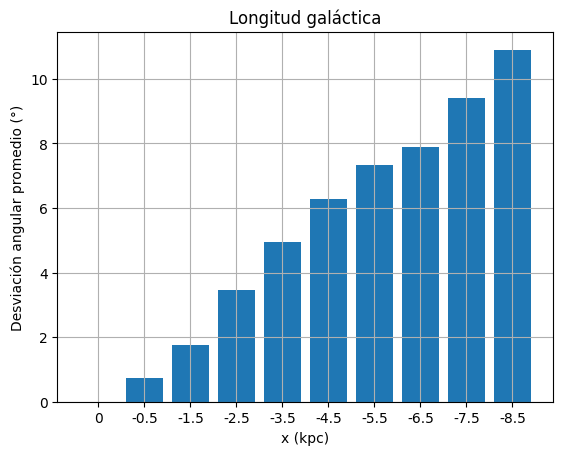

In [252]:
x_coord_cart = ['0', '-0.5', '-1.5', '-2.5', '-3.5','-4.5','-5.5','-6.5','-7.5','-8.5']

plt.bar(x_coord_cart, var_l_mean_values)
plt.xlabel('x (kpc)')
plt.ylabel('Desviación angular promedio (°)')
plt.title('Longitud galáctica')
plt.grid()
plt.savefig('Plots/var_gal_long_x_dist.jpg')
plt.show()

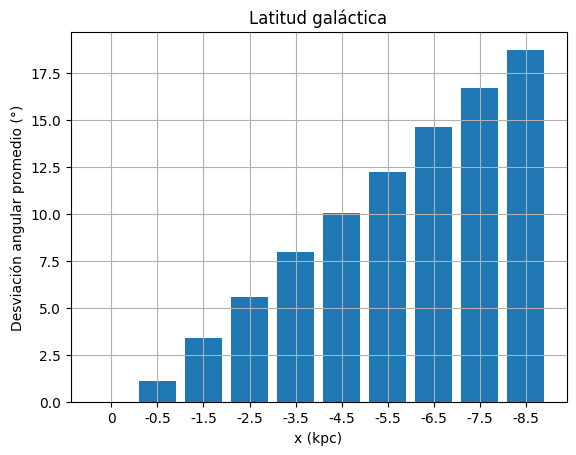

In [253]:
plt.bar(x_coord_cart, var_b_mean_values)
plt.xlabel('x (kpc)')
plt.ylabel('Desviación angular promedio (°)')
plt.title('Latitud galáctica')
plt.grid()
plt.savefig('Plots/var_gal_lat_x_dist.jpg')
plt.show()

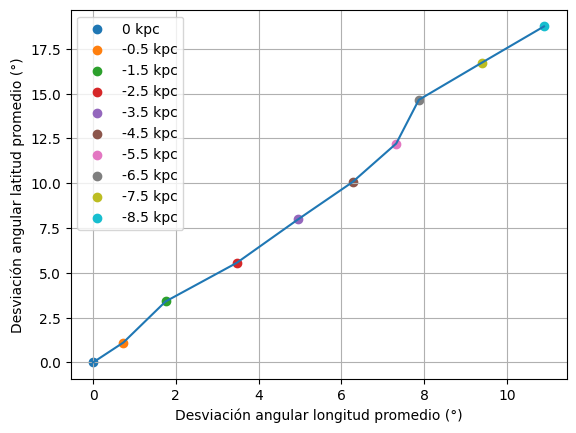

In [254]:
for i in range(len(x_coord_cart)):
    plt.scatter(var_l_mean_values[i], var_b_mean_values[i], label=str(x_coord_cart[i])+ ' kpc' )

plt.plot(var_l_mean_values, var_b_mean_values)
plt.xlabel('Desviación angular longitud promedio (°)')
plt.ylabel('Desviación angular latitud promedio (°)')

plt.legend()
plt.grid()
plt.savefig('Plots/var_coord_gal_dist.jpg')
plt.show()